In [24]:
import pandas as pd
import numpy as np

In [3]:
# Load the data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

('Train data shape:', (1460, 81))
('Test data shape:', (1459, 80))


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
# Set the default size
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# Try to predict SalePrice - target variable
# Get more information about Saleprice
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

('Skew is:', 1.8828757597682129)


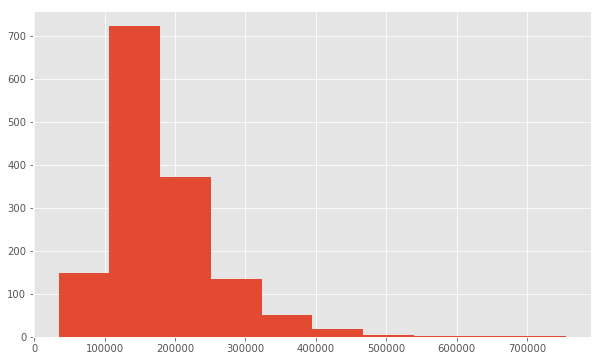

In [8]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice)
plt.show()

('Skew is:', 0.12133506220520406)


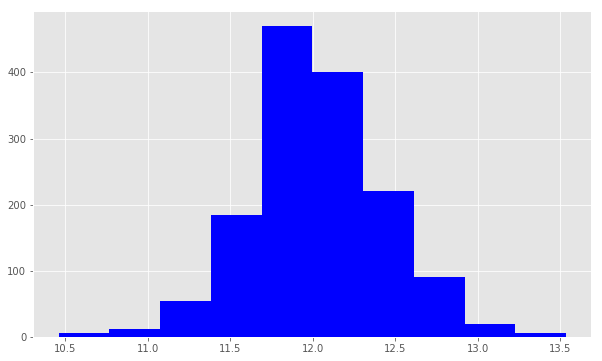

In [9]:
# transform SalePrice in logscale
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [10]:
# check the types of the feature
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
# Check the correlation between the columns
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

(SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64, '\n')
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first five features are most positively correlated with SalePrice, the second five are the most negatively correlated

In [12]:
# Get the unique values of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [13]:
# Create a pivot table 
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [14]:
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

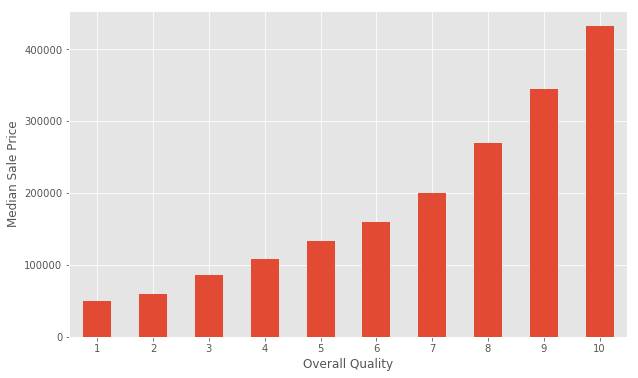

In [15]:
# Create a chart
quality_pivot.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

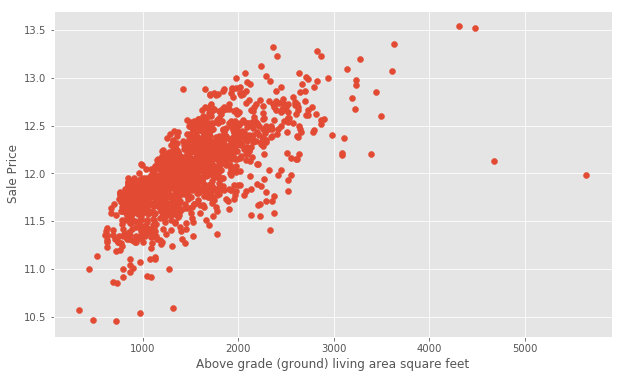

In [16]:
# Create a scatter plot to visualize the relationship between the Ground Living Area and SalePrice
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

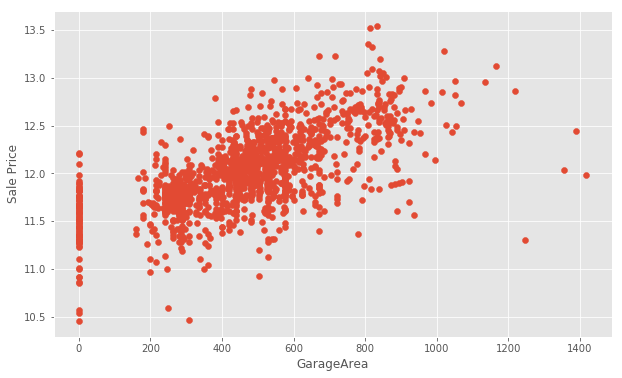

In [17]:
# Do same thing with GarageArea
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()

In [18]:
# Create a new dataframe with some outliers removed
train = train[train['GarageArea'] < 1200]

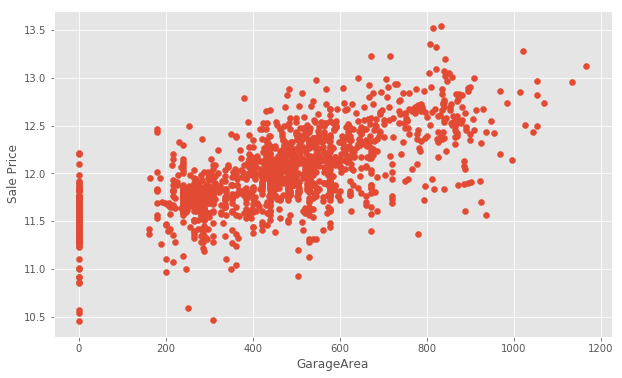

In [19]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
plt.show()

In [20]:
# Counting the Null Values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [21]:
print ("Unique values are:", train.MiscFeature.unique())

('Unique values are:', array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object))


In [22]:
# Check non-numeric features
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


count: indicate the count of non-null observations
unique: count the number of unique values
top: the most commonly occurring value
freq: the frequency of the top value

In [23]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

(Pave    1450
Grvl       5
Name: Street, dtype: int64, '\n')


In [25]:
# Transform features into nummerical data
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [26]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


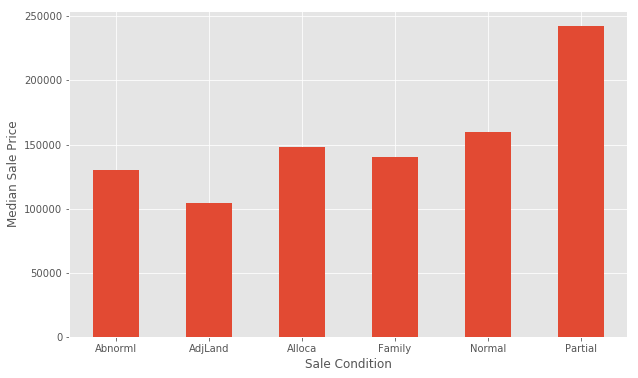

In [27]:
# Draw a pivot table for saleCondition
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [28]:
# Set Patrial to 1 and otherwise to 0
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

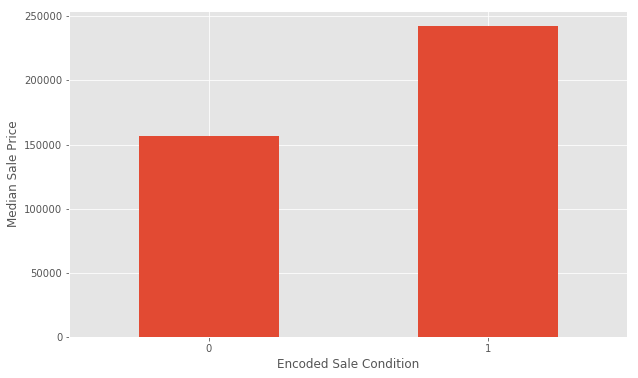

In [29]:
# Draw a pivot table for saleCondition
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [30]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna() 
sum(data.isnull().sum() != 0)

0

In [31]:
# assign the features to X and the target variable to 
y = np.log(train.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis = 1)

In [33]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [36]:
# Modelling using linear regression model
from sklearn import linear_model
# Create classifier 
lr = linear_model.LinearRegression()

In [37]:
# Fit the data
model = lr.fit(x_train, y_train)

In [38]:
# Evaluate the performance by checking r-squared
print "R^2 is: \n", model.score(x_test, y_test)

R^2 is: 
0.888247770926


In [40]:
predictions = model.predict(x_test)

In [41]:
# RMSE: Root mean squared error
from sklearn.metrics import mean_squared_error
print 'RMSE is: \n', mean_squared_error(y_test, predictions)

RMSE is: 
0.0178417945196


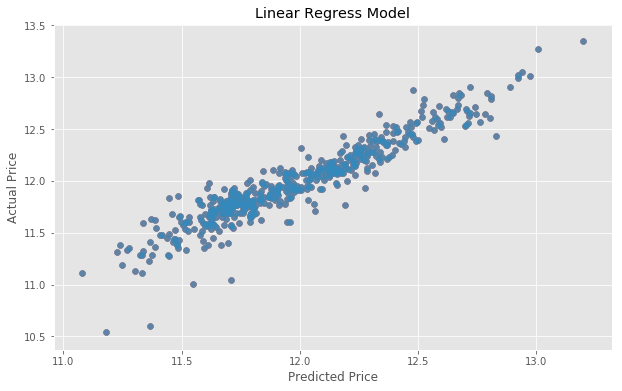

In [43]:
plt.scatter(predictions, y_test, alpha=0.75)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regress Model')
plt.show()

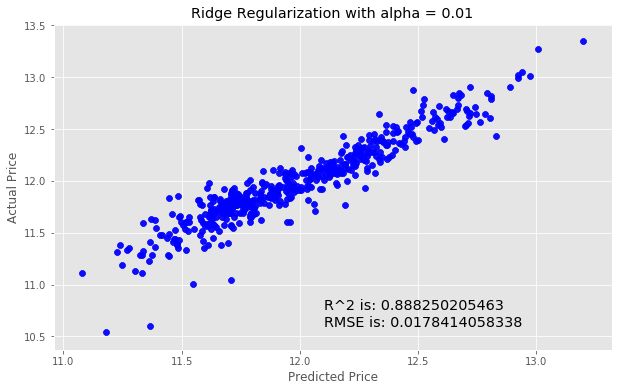

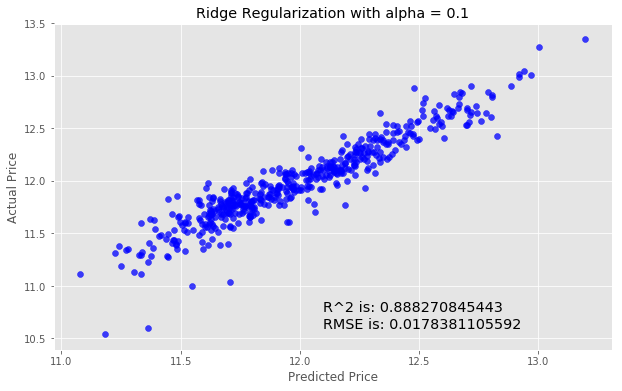

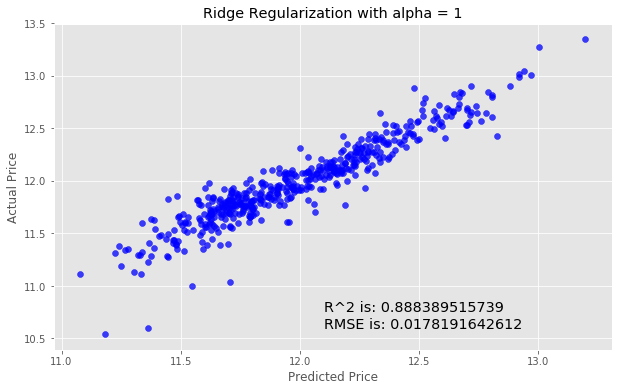

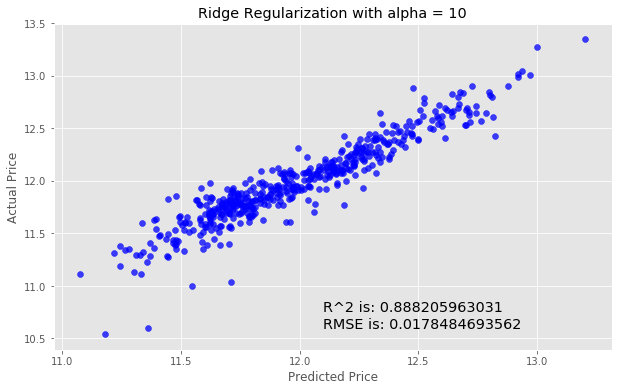

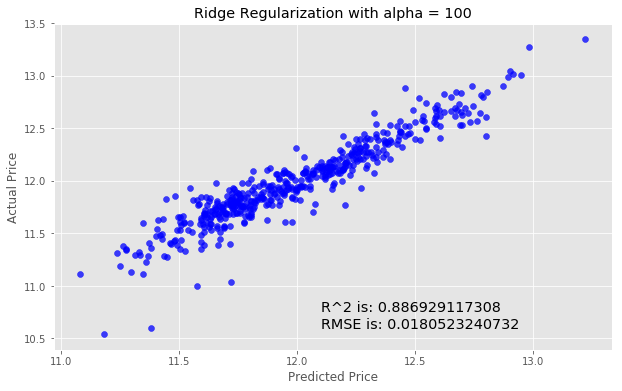

In [47]:
# Improve the performance by Ridge Regularization
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(x_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [48]:
# Make a submission
submission = pd.DataFrame()
submission['Id'] = test.Id

In [49]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [50]:
predictions = model.predict(feats)

In [51]:
final_predictions = np.exp(predictions)

In [52]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [53]:
submission.to_csv('submission1.csv', index=False)